<a href="https://colab.research.google.com/github/lucca-fsc/EmotionDetection/blob/main/Sentiment_Analysis_with_SkLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis with SkLearn


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
!git clone https://github.com/laxmimerit/IMDB-Movie-Reviews-Large-Dataset-50k.git

Cloning into 'IMDB-Movie-Reviews-Large-Dataset-50k'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


In [3]:
df = pd.read_excel('/content/IMDB-Movie-Reviews-Large-Dataset-50k/train.xlsx')

## TFIDF


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

In [5]:
df.head()

,Reviews,Sentiment
0,"When I first tuned in on this morning news, I ...",neg
1,"Mere thoughts of ""Going Overboard"" (aka ""Babes...",neg
2,Why does this movie fall WELL below standards?...,neg
3,Wow and I thought that any Steven Segal movie ...,neg
4,"The story is seen before, but that does'n matt...",neg


In [6]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-gd3qz4v9
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-gd3qz4v9
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=11756 sha256=bc3e06638869447890e4afd22fae3d614bb98521a6f3f40c0918b64be43a6470
  Stored in directory: /tmp/pip-ephem-wheel-cache-iy7ni8yf/wheels/0d/b3/29/bfe3deffda68980088d17b81331be6667e837ffb4a071bae82
Successfully built preprocess-kgptalkie


In [7]:
from gensim.parsing.preprocessing import remove_stopwords

In [8]:
print(remove_stopwords("Restaurant had a really good service!!"))
print(remove_stopwords("I did not like the food!!"))
print(remove_stopwords("This product is not good"))

Restaurant good service!!
I like food!!
This product good


In [9]:
line = "Restaurant had a really good service!!"
print("Splitting line by space:")
print(line.split(" "))

Splitting line by space:
['Restaurant', 'had', 'a', 'really', 'good', 'service!!']


In [10]:
import re
line = "Restaurant had a really good service!!"
print("Splitting with regex:")
print(re.sub(' +', ' ', line).strip().split(" "))

Splitting with regex:
['Restaurant', 'had', 'a', 'really', 'good', 'service!!']


In [11]:
from gensim.utils import tokenize
line = "Restaurant had a really good service!!"
print("tokenize function to get the tokens: ")
print(list(tokenize(line, deacc=True)))

tokenize function to get the tokens: 
['Restaurant', 'had', 'a', 'really', 'good', 'service']


In [12]:
import  preprocess_kgptalkie as ps
import re

def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_rt(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [13]:
df['Reviews'] = df['Reviews'].apply(lambda x: get_clean(x))

In [14]:
df.head()

,Reviews,Sentiment
0,when i first tuned in on this morning news i t...,neg
1,mere thoughts of going overboard aka babes aho...,neg
2,why does this movie fall well below standards ...,neg
3,wow and i thought that any steven segal movie ...,neg
4,the story is seen before but that doesand matt...,neg


In [15]:
tfidf = TfidfVectorizer(max_features=5000)
X = df['Reviews']
y = df['Sentiment']

X = tfidf.fit_transform(X)

In [16]:
print(len(tfidf.vocabulary_))

5000


In [17]:
tfidf.vocabulary_

{'when': 4857,
 'first': 1736,
 'in': 2246,
 'on': 3099,
 'this': 4451,
 'morning': 2902,
 'news': 2997,
 'thought': 4456,
 'wow': 4960,
 'finally': 1723,
 'some': 4054,
 'entertainment': 1499,
 'it': 2357,
 'was': 4799,
 'slightly': 4021,
 'amusing': 228,
 'for': 1783,
 'week': 4831,
 'or': 3121,
 'so': 4038,
 'but': 644,
 'we': 4817,
 'have': 2049,
 'to': 4502,
 'face': 1615,
 'these': 4439,
 'if': 2211,
 'one': 3101,
 'can': 673,
 'even': 1532,
 'call': 658,
 'them': 4431,
 'that': 4423,
 'way': 4814,
 'too': 4517,
 'much': 2929,
 'playing': 3297,
 'around': 303,
 'of': 3076,
 'fresh': 1831,
 'air': 171,
 'seriously': 3885,
 'woman': 4919,
 'has': 2041,
 'got': 1942,
 'not': 3034,
 'the': 4425,
 'least': 2546,
 'bit': 495,
 'journalist': 2411,
 'her': 2082,
 'she': 3918,
 'is': 2351,
 'very': 4718,
 'keeps': 2442,
 'steve': 4175,
 'he': 2052,
 'starts': 4153,
 'viewers': 4733,
 'about': 72,
 'certain': 744,
 'report': 3629,
 'just': 2428,
 'really': 3549,
 'become': 439,
 'annoying'

In [18]:
X

<25000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 2845641 stored elements in Compressed Sparse Row format>

In [19]:
print(X)

  (0, 3884)	0.06122492715124015
  (0, 1311)	0.03184254854488611
  (0, 1242)	0.094874389746662
  (0, 2635)	0.04528158101278558
  (0, 3092)	0.06770225573920378
  (0, 206)	0.0335106113756134
  (0, 220)	0.0683759265176592
  (0, 4503)	0.062030436784394606
  (0, 600)	0.09673135909474233
  (0, 2964)	0.07849346970210537
  (0, 4179)	0.07215850040574179
  (0, 4837)	0.03257220027250918
  (0, 3089)	0.0579974168074882
  (0, 4455)	0.04178063440281698
  (0, 1384)	0.06503621981498922
  (0, 4182)	0.038782272087212064
  (0, 4060)	0.059301245135300024
  (0, 1498)	0.055943530407233405
  (0, 2031)	0.048694241992215566
  (0, 4595)	0.05253552256287277
  (0, 2176)	0.045266125794291165
  (0, 3521)	0.04802105460298156
  (0, 4954)	0.02786754156681438
  (0, 3038)	0.06703517290156592
  (0, 692)	0.057087108212816734
  :	:
  (24999, 4866)	0.047525381804043455
  (24999, 2900)	0.05294191195528048
  (24999, 3549)	0.0573477782974248
  (24999, 2428)	0.024488140224721195
  (24999, 72)	0.04897377739623803
  (24999, 2351)	0

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [21]:
clf = LinearSVC()
clf.fit(X_train, y_train)

LinearSVC()

In [22]:
y_pred = clf.predict(X_test)

In [23]:
print('Accuracy of the Algorithm is: {}'.format(accuracy_score(y_test, y_pred)))

Accuracy of the Algorithm is: 0.8746


In [24]:
confusion_matrix(y_test, y_pred)

array([[2163,  317],
       [ 310, 2210]])

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         neg       0.87      0.87      0.87      2480
         pos       0.87      0.88      0.88      2520

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


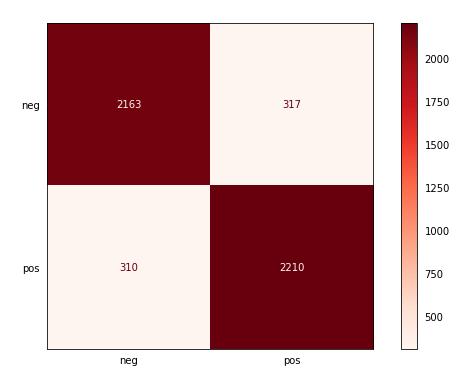

In [26]:
matrix = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Reds)
matrix.ax_.set_title('Confusion matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,6)
plt.show()

## Utilizando KNN


In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn = KNeighborsClassifier(n_neighbors = 5 )
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [30]:
accuracy = accuracy_score(y_test, y_predict) * 100
f1 = f1_score(y_test, y_predict, average = 'macro') * 100

print('Accuracy K-NN from sk-learn: {:.2f}%'.format(accuracy))
print('F1 Score K-NN from sk-learn: {:.2f}%'.format(f1))

Accuracy K-NN from sk-learn: 72.76%
F1 Score K-NN from sk-learn: 72.75%


In [31]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[1784,  696],
       [ 666, 1854]])

In [32]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         neg       0.73      0.72      0.72      2480
         pos       0.73      0.74      0.73      2520

    accuracy                           0.73      5000
   macro avg       0.73      0.73      0.73      5000
weighted avg       0.73      0.73      0.73      5000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


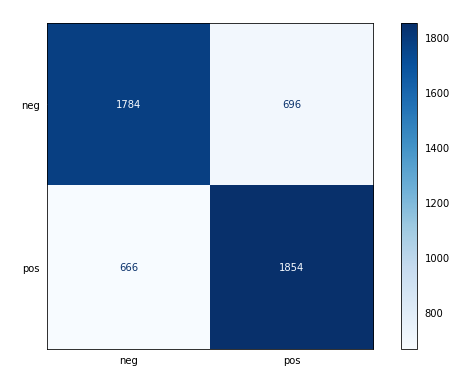

In [33]:
from sklearn.metrics import plot_confusion_matrix

matrix = plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,6)
plt.show()

## Classificador Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

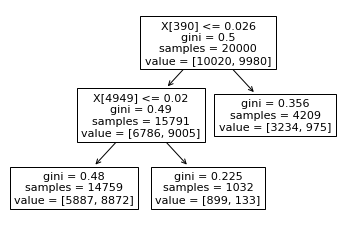

In [35]:
clf = DecisionTreeClassifier(max_leaf_nodes=3)
clf.fit(X_train, y_train)

tree.plot_tree(clf)
plt.show()

In [36]:
y_predicted = clf.predict(X_test)
print(y_predicted)

['pos' 'neg' 'neg' ... 'pos' 'pos' 'neg']


In [37]:
accuracy = accuracy_score(y_test, y_predicted) * 100
f1 = f1_score(y_test, y_predicted, average = 'macro') * 100

print('Accuracy Decision Tree from Sk-learn: {:.2f}%'.format(accuracy))
print('F1 Score Decision Tree from Sk-learn: {:.2f}%'.format(f1))

Accuracy Decision Tree from Sk-learn: 65.46%
F1 Score Decision Tree from Sk-learn: 63.30%


In [38]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         neg       0.79      0.42      0.54      2480
         pos       0.61      0.89      0.72      2520

    accuracy                           0.65      5000
   macro avg       0.70      0.65      0.63      5000
weighted avg       0.70      0.65      0.63      5000



In [39]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[1030, 1450],
       [ 277, 2243]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


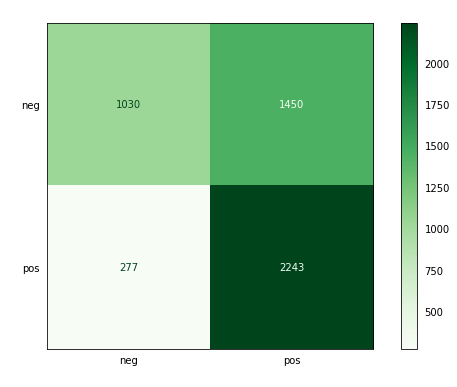

In [40]:
matrix = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Greens)
matrix.ax_.set_title('Confusion matrix', color='white')
plt.xlabel('Predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.gcf().axes[0].tick_params(color='white')
plt.gcf().axes[1].tick_params(color='white')
plt.gcf().set_size_inches(10,6)
plt.show()

### Testes visuais para esclarecimento

In [41]:
x = 'Im very happy today'

x = get_clean(x)
vec = tfidf.transform([x])

In [42]:
vec.shape

(1, 5000)

In [43]:
clf.predict(vec)

array(['pos'], dtype=object)

In [44]:
x = 'I loved this movie, it made me so happy, thanks <3 :)'

x = get_clean(x)
vec = tfidf.transform([x])

In [45]:
x

'i loved this movie it made me so happy thanks 3'

In [46]:
clf.predict(vec)

array(['pos'], dtype=object)

In [47]:
x = 'My life is a mess'
x = get_clean(x)
vec = tfidf.transform([x])


In [48]:
clf.predict(vec)

array(['pos'], dtype=object)

Utilizando diversos métodos classificadores de uma única vez

In [49]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC

names = [
         'Nearest-Neighbors',
         'Linear SVM',
         'RBF SVM',
         'Poly SVM',
         'Decision Tree',
         'Random Forest',
         'Neural Net',
         'Adaboost',
]

classifiers = [
               KNeighborsClassifier(3),
               SVC(kernel = 'linear'),
               SVC(gamma = 2, C = 10),
               SVC(kernel = 'poly'),
               DecisionTreeClassifier(max_depth=5),
               RandomForestClassifier(max_depth = 5, n_estimators = 10, max_features = 1),
               MLPClassifier(alpha=1, max_iter=1000),
               AdaBoostClassifier(),
]

for name, clf in zip(names, classifiers):
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  print(name + ' - Accuracy:' + str(score))

Nearest-Neighbors - Accuracy:0.7258
Linear SVM - Accuracy:0.8814
RBF SVM - Accuracy:0.8846
Poly SVM - Accuracy:0.8814
Decision Tree - Accuracy:0.7
Random Forest - Accuracy:0.5364
Neural Net - Accuracy:0.8614
Adaboost - Accuracy:0.7926


In [50]:
# clf = SVC(gamma = 2, C = 10)

In [51]:
clf.fit(X_train, y_train)

AdaBoostClassifier()